<a href="https://colab.research.google.com/github/ashraf-badalov/ml-projects/blob/master/svm_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [20]:
class SVM:

  def __init__(self, lr = 0.001, lambda_pr = 0.01, n_iters = 1000):
    self.lr = lr
    self.lambda_pr = lambda_pr
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    self.w = np.zeros(n_features)
    self.b = 0

    y_ = np.where(y<=0, -1, 1)

    for _ in range(self.n_iters):
      for index, x_i in enumerate(X):
        condition = y_[index] * (np.dot(x_i, self.w) - self.b) >= 1
        if condition:
          self.w -=  self.lr * 2 * self.lambda_pr * self.w

        else:
          self.w -= self.lr * (2 * self.lambda_pr * self.w - np.dot(y_[index], x_i))
          self.b -= self.lr * y_[index]

  def predict(self, X):
    pred = np.dot(X, self.w) - self.b
    return np.sign(pred)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [51]:
X, y = datasets.make_blobs(n_samples = 100, n_features = 2, centers = 2, cluster_std = 1, random_state=40)

y = np.where(y==0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 78)

In [52]:
from sklearn.metrics import accuracy_score

svm = SVM()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(acc)

1.0


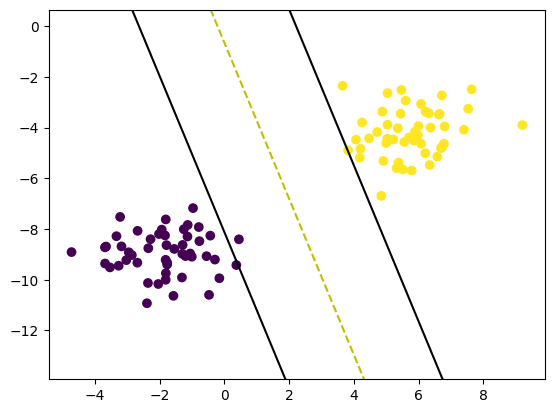

In [55]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, svm.w, svm.b, 0)
        x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)
        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

visualize_svm()
